Selection Problem

* Set use_input_txt = 1 if you want to use input from file, or set use_input_txt = 0 to auto generate input data.
* Upload input.txt to current directory at the "Files" bar on the left
* Click "Runtime" and "Run all" and see the output file QS.txt and PS.txt in current directory





In [1]:
use_input_txt = 0#@param
min_input_size = 10000#@param
max_input_size = 30000#@param
step = 1000#@param
sample_size = 3#@param

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [3]:
def partition(mlist, low, high):
  i = low
  pivot = mlist[high]
  for j in range(low, high):
    if mlist[j] <= pivot:
      mlist[i], mlist[j] = mlist[j], mlist[i]
      i = i + 1
  mlist[i], mlist[high] = mlist[high], mlist[i]
  return i

def quick_sort(mlist, low, high):
  if len(mlist) == 1:
    return mlist
  if low < high:
    index = partition(mlist, low, high)
    quick_sort(mlist, low, index - 1)
    quick_sort(mlist, index + 1, high)

def selection_by_sorting(mlist, k):
  # mlist.sort()
  quick_sort(mlist, 0, len(mlist) - 1)
  return mlist[k-1]

In [4]:
def selection_by_prune_and_search(mlist, k):
  # print("k:", k)
  # print("mlist:", mlist)
  if len(mlist) < 5:
    return selection_by_sorting(mlist, k)
  # print(5 - len(mlist) % 5)
  mlist = np.append(mlist, [np.inf] * (5 - len(mlist) % 5))
  # print(mlist)
  matrix = np.reshape(mlist, (-1, 5))
  # print(matrix)
  subset_median = []
  for subset in matrix:
    # print(subset)
    subset_median.append(selection_by_sorting(subset, 3))
  # print("subset_median:", subset_median)
  # subset_median.sort()
  # subset_median_median = subset_median[(len(subset_median) - 1) // 2]
  subset_median_median = selection_by_prune_and_search(subset_median, (len(subset_median) + 1) // 2)
  # print("subset_median_median:", subset_median_median)
  S1 = mlist[mlist < subset_median_median]
  S2 = mlist[mlist == subset_median_median]
  S3 = mlist[mlist > subset_median_median]
  # print(S1, S2, S3)
  if len(S1) >= k:
    return selection_by_prune_and_search(S1, k)
  elif len(S1) + len(S2) >= k:
    return subset_median_median
  else:
    return selection_by_prune_and_search(S3, k - len(S1) - len(S2))

In [5]:
def print_answer(answer, time, file_name):
  print(f"Answer: {answer}")
  print(f"Time: {time} s")
  with open(file_name, "w") as text_file:
    print(f"{answer}", file=text_file)
    print(f"{time:.6f}", file=text_file)


def gen_input(n):
  mlist = np.random.randint(1, 20001, size=n)#.astype(np.float32)
  # some test case
  # cost_matrix[0,:] = np.inf
  # cost_matrix[0,1] = -1
  # cost_matrix = np.ones((n, n))
  k = np.random.randint(1, n + 1)
  return mlist, k

selection_by_sorting_time = []
selection_by_prune_and_search_time = []
np.set_printoptions(formatter={'float': '{: 0.0f}'.format})

if use_input_txt:
  # input = np.loadtxt('input.txt')
  # print(input)
  input_k = np.loadtxt('input.txt', dtype=int, max_rows=1)[1]
  input_list = np.loadtxt('input.txt', dtype=int, skiprows=1)
  # print(input)
  min_input_size = input_list.shape[0]
  max_input_size = min_input_size

for n in range(min_input_size, max_input_size + 1, step):
  print("_____________________________________")
  print("n:", n)
  if use_input_txt:
    mlist, k = input_list, input_k
  else:
    mlist, k = gen_input(n)
  print(f"input: {mlist}")
  print(f"k: {k}")
  print("")
  print("selection by sorting")
  start = timeit.default_timer()
  selection_by_sorting_answer = selection_by_sorting(mlist, k)
  stop = timeit.default_timer()
  if use_input_txt:
    time = stop - start
  else:
    run_time_samples = timeit.repeat(stmt='selection_by_sorting(t_mlist, t_k)', setup='from __main__ import gen_input, selection_by_sorting, n; t_mlist, t_k = gen_input(n)', repeat=sample_size, number=1)
    time = np.average(run_time_samples)
    print("run_time_samples: ", run_time_samples)
  print_answer(selection_by_sorting_answer, time, "QS.txt")

  selection_by_sorting_time.append(time)
  print("")
  print("selection by prune and search")
  start = timeit.default_timer()
  selection_by_prune_and_search_answer = selection_by_prune_and_search(mlist, k).astype(int)
  stop = timeit.default_timer()
  if use_input_txt:
    time = stop - start
  else:
    run_time_samples = timeit.repeat(stmt='selection_by_prune_and_search(t_mlist, t_k)', setup='from __main__ import gen_input, selection_by_prune_and_search, n; t_mlist, t_k = gen_input(n)', repeat=sample_size, number=1)
    time = np.average(run_time_samples)
    print("run_time_samples: ", run_time_samples)
  print_answer(selection_by_prune_and_search_answer, time, "PS.txt")

  selection_by_prune_and_search_time.append(time)

  assert selection_by_sorting_answer == selection_by_prune_and_search_answer, "Answer is different!"

_____________________________________
n: 10000
input: [ 1173 10167 10359 ...  9740 16438 11206]
k: 5075

selection by sorting
run_time_samples:  [0.1263820270000906, 0.13055782900028134, 0.11892000299985739]
Answer: 9916
Time: 0.12528661966674312 s

selection by prune and search
run_time_samples:  [0.13655947799998103, 0.12540158199999496, 0.11221503100023256]
Answer: 9916
Time: 0.12472536366673619 s
_____________________________________
n: 11000
input: [13205  6931  7742 ...  4120 16130 13537]
k: 4956

selection by sorting
run_time_samples:  [0.12798654900007023, 0.14104582299978574, 0.18218635599987465]
Answer: 9158
Time: 0.15040624266657687 s

selection by prune and search
run_time_samples:  [0.07522446199982369, 0.05763340999965294, 0.06830572799981383]
Answer: 9158
Time: 0.06705453333309681 s
_____________________________________
n: 12000
input: [16228 10788   955 ... 18116 12230  9650]
k: 6248

selection by sorting
run_time_samples:  [0.09015442400004758, 0.08306240500041895, 0.0

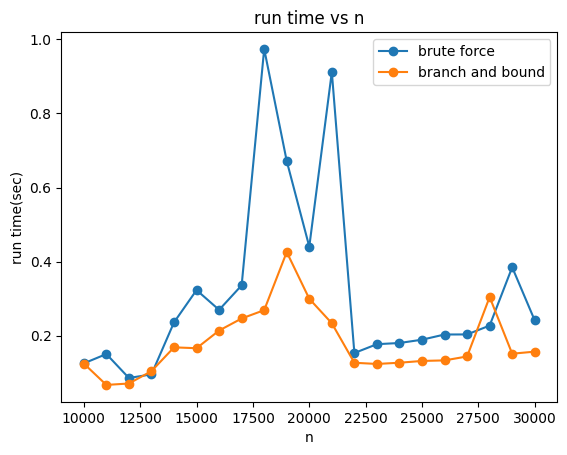

In [6]:
x = np.arange(min_input_size, max_input_size + 1, step)
# bf_time = brute_force_time[:max_brute_force_input_size - min_input_size + 1]
plt.plot(x, selection_by_sorting_time, marker='o')
plt.plot(x, selection_by_prune_and_search_time, marker='o')
plt.xlabel('n')
plt.ylabel('run time(sec)')
plt.title('run time vs n')
plt.legend(['brute force', 'branch and bound'])
# plt.xticks(x)
plt.show()